## Dependecies:
- numpy, pandas, matplotlib, seaborn, sklearn, keras, pydot
# Read in training and testing data and do some housekeeping:
1. Remove duplicate rows
2. Split both datasets into an n-dim feature/design matrix and 1-dim target/predictor vector
3. Manually encode a value to the binary categorical labels of the target/predictor vector

In [1]:
import numpy as np
import pandas as pd


# Read in the data, note: 'education-num' is a proxy for level education
dataTypes = {'age':np.uint8,'workclass':'category', 'fnlwgt':np.uint32, 'education':'category', 'education-num':np.uint8,
             'marital-status':'category', 'occupation':'category', 'relationship':'category', 'race':'category', 'sex':'category', 
             'capital-gain':np.uint32, 'capital-loss':np.uint32, 'hours-per-week':np.uint8, 'native-country':'category',
             'class':'category'}

# Note, we have a mixture of categorical and numerical data,
df_train = pd.read_csv('trainingData/au_train.csv', dtype=dataTypes, skipinitialspace=True, engine='c')
df_test = pd.read_csv('testingData/au_test.csv', dtype=dataTypes, skipinitialspace=True ,engine='c')


# Shuffle training set
df_train = df_train.sample(frac=1)#random_state,weights


# Check for duplicate rows
# print(df_train.drop(columns=['class']).drop_duplicates(inplace=True))
# print(df_test.drop(columns=['class']).drop_duplicates(inplace=True))


# Check to see that samples do not have both a non-zero 'capital-gain' and 'capital-loss'
# checkGain = np.where(df_train['capital-gain'].to_numpy()>0,1,0)
# checkLoss = np.where(df_train['capital-loss'].to_numpy()>0,1,0)
# maxOfSumGainLoss = max(checkGain+checkLoss)
# print(maxOfSumGainLoss)


# Check some information and for bad values
# print('\nCheck some prelimiary info and for missing values/NaN:')
# print(df_train.info(),df_test.info())
# print(df_train.describe(),df_test.describe())


# Check for unlabeled categorical features in our DataFrames / misspellings
# print(sorted(list(df_train['workclass'].unique())))
# print(sorted(list(df_train['occupation'].unique())))
# print(sorted(list(df_train['native-country'].unique())))
# print(sorted(list(df_test['workclass'].unique())))
# print(sorted(list(df_test['occupation'].unique())))
# print(sorted(list(df_test['native-country'].unique())))


# I feel `education` and `education-num` is redundant since `education-num` is an ordinally encoded
# version of `education` category that is order by level of education (good), I'll drop the category
# df_train = df_train.drop(columns=['education'])
# df_test = df_test.drop(columns=['education'])
# df_train = df_train.drop(columns=['fnlwgt'])
# df_test = df_test.drop(columns=['fnlwgt'])
# df_train = df_train.drop(columns=['capital-gain'])
# df_test = df_test.drop(columns=['capital-gain'])
# df_train = df_train.drop(columns=['capital-loss'])
# df_test = df_test.drop(columns=['capital-loss'])
df_train = df_train.drop(columns=['education-num'])
df_test = df_test.drop(columns=['education-num'])
df_train = df_train.drop(columns=['relationship'])
df_test = df_test.drop(columns=['relationship'])

# Check for misspelled labels
# categories = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class']
categories = [catFeat for catFeat in df_train.select_dtypes(include="category")]
for cat in categories:
    a = set(df_train[cat].unique())
    b = set(df_test[cat].unique())
    if len(a.difference(b)):
        print('\nProblem while checking for missing/bad labels:')
        print('Categories in `%s` column of df_train not in df_test:'%cat,a.difference(b))
        print('Categories in `%s` column of df_test not in df_train:'%cat,b.difference(a))

# Note: The test sets target has an extraneous '.' at the end. Handle this manually later
# In addition there is no entry for 'Holand-Netherlands' in the test set so you could argue that data 
# to train on may not be needed
print('\n\n# of entries before dropping Holand-Netherlands:',len(df_train))
# df_train = df_train.replace('Holand-Netherlands',-1)
# print(df_train.query('`native-country`==-1',engine='python'))
df_train = df_train.replace('Holand-Netherlands',np.nan).dropna()
print('# of entries after dropping Holand-Netherlands:',len(df_train))



# Have some unlabeled/missing values (i.e '?') of categorical features in: 
#                'workclass','occupation','native-country'
# in both our training and testing DataFrame (categorical), need to drop those
print('\n\n# of rows in df_train before dropping unlabeled/missing values:',len(df_train))
df_train = df_train.replace('?',np.nan).dropna()
print('# of rows in df_train after dropping unlabeled/missing values:',len(df_train))
print('\n\n# of rows in df_test before dropping unlabeled/missing values:',len(df_test))
df_test = df_test.replace('?',np.nan).dropna()
print('# of rows in df_test after dropping unlabeled/missing values:',len(df_test))


# Split our data into 'X' commonly referred to as the 'Design Matrix' which contains our 
# 'predictors/features' and 'y' containing our prediction labels
y_train = df_train['class'].to_numpy()
X_train = df_train.drop(columns=['class'])

y_test = df_test['class'].to_numpy()
X_test = df_test.drop(columns=['class'])


# Manually encode (easy to do for a 1d array) a numerical value for our predictor which had
# a binary value
#            <=50K  --->    0
#             >50K  --->    1
y_train = np.where(y_train=='>50K',1,0)
y_test = np.where(y_test=='>50K.',1,0) # Handling that extra period '.'


# Check to see the distribution of the predictors in both sets
print('\n\nTraining predictor has',len(y_train),'samples and',np.sum(y_train),'of those samples \
are classified as >50K')
print('% of training sample >50K:',np.sum(y_train)/len(y_train))
print('% of training sample <=50K:',1-np.sum(y_train)/len(y_train))
print('\n\nTesting predictor has',len(y_test),'samples and',np.sum(y_test),'of those samples \
are classified as `>50K`')
print('% of testing sample >50K:',np.sum(y_test)/len(y_test))
print('% of testing sample <=50K:',1-np.sum(y_test)/len(y_test))


Problem while checking for missing/bad labels:
Categories in `native-country` column of df_train not in df_test: {'Holand-Netherlands'}
Categories in `native-country` column of df_test not in df_train: set()

Problem while checking for missing/bad labels:
Categories in `class` column of df_train not in df_test: {'>50K', '<=50K'}
Categories in `class` column of df_test not in df_train: {'<=50K.', '>50K.'}


# of entries before dropping Holand-Netherlands: 32561
# of entries after dropping Holand-Netherlands: 32560


# of rows in df_train before dropping unlabeled/missing values: 32560
# of rows in df_train after dropping unlabeled/missing values: 30161


# of rows in df_test before dropping unlabeled/missing values: 16281
# of rows in df_test after dropping unlabeled/missing values: 15060


Training predictor has 30161 samples and 7508 of those samples are classified as >50K
% of training sample >50K: 0.24893073837074367
% of training sample <=50K: 0.7510692616292564


Testing predicto

# Note: There is more data for people making  <=50K, The target distribution in both training and testing data is the same but imbalanced

## Poke around the data to see if any of the features are skewed or may need scaling
## Visualization

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.colors import LogNorm

groupbySex = X_test.groupby('sex')
colorDict = {'Male':'b','Female':'r'}
for sex,group in groupbySex:
#     print(sex)
#     print(group.describe(),'\n\n')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    fig.patch.set_facecolor('xkcd:gray')
    fig.suptitle(sex)
    group.plot(x='capital-gain',y='age',kind='scatter',ax=axes[0,0], c=colorDict[str(sex)],label=sex,legend=True,alpha=.4)
    group.plot(x='capital-gain',y='education-num',kind='hexbin',ax=axes[0,1],gridsize=15,cmap='viridis',norm=LogNorm())
    group.plot(x='capital-loss',y='age',kind='scatter',ax=axes[1,0],c=colorDict[str(sex)],label=sex,legend=True,alpha=.4)
    group.plot(x='capital-loss',y='education-num',kind='hexbin',ax=axes[1,1],gridsize=15,cmap='viridis',norm=LogNorm())

groupbyRace = X_test.groupby('race')
colorDict = {'White':'r','Asian-Pac-Islander':'g','Amer-Indian-Eskimo':'b','Other':'c','Black':'m'}
for race,group in groupbyRace:
#     print(sex)
#     print(group.describe(),'\n\n')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    fig.patch.set_facecolor('xkcd:gray')
    fig.suptitle(race)
    group.plot(x='capital-gain',y='age',kind='scatter',ax=axes[0,0], c=colorDict[str(race)],label=sex,legend=True,alpha=.4)
    group.plot(x='capital-gain',y='education-num',kind='hexbin',ax=axes[0,1],gridsize=15,cmap='viridis',norm=LogNorm())
    group.plot(x='capital-loss',y='age',kind='scatter',ax=axes[1,0],c=colorDict[str(race)],label=sex,legend=True,alpha=.4)
    group.plot(x='capital-loss',y='education-num',kind='hexbin',ax=axes[1,1],gridsize=15,cmap='viridis',norm=LogNorm())
    
    
# Plot correlation matrix
labelNames = [numFeat for numFeat in X_train.select_dtypes(include=np.number)]
corr = X_train[labelNames[:]].corr()


im = plt.matshow(corr,cmap='viridis',interpolation='bilinear',norm=LogNorm())
plt.xticks(np.arange(corr.shape[1]),labels=labelNames,rotation=45,va='bottom',ha='left')
plt.yticks(np.arange(corr.shape[0]),labels=labelNames)
plt.colorbar(im)

## Visualization of categorical data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Left plots belong to train and Right plots belong to test
# PLot sample distribution of race for training and test set
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='race', hue='sex',ax=axes[0],data=df_train)
sns.countplot(x='race', hue='sex',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='education-num', hue='race',ax=axes[0],data=df_train)
sns.countplot(x='education-num', hue='race',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(y='age',ax=axes[0],data=df_train)
sns.countplot(y='age',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(x='education-num',ax=axes[0],data=df_train)
sns.countplot(x='education-num',ax=axes[1],data=df_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.countplot(y='occupation', hue='sex',ax=axes[0],data=df_train)
sns.countplot(y='occupation', hue='sex',ax=axes[1],data=df_test)

# The data is still heterogeneous(mixed numerical and categorical data), *scikit-learn* requires explicit conversion of categorical features to numeric values (**preprocessing**).
1. Possibility to scale the numeric features (helpful sometimes i.e convergence)
2. Categorical data will be *OneHotEncoded* to guarantee model sensitivity only to the original category labels

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

# Create the preprocessing pipelines for categorical data of training set.
train_numeric_features = [numFeat for numFeat in X_train.select_dtypes(include=np.number)]
train_numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

train_categorical_features = [catFeat for catFeat in X_train.select_dtypes(include="category")]
train_categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', train_numeric_transformer, train_numeric_features),
        ('cat', train_categorical_transformer, train_categorical_features)],
        remainder='passthrough') # Don't drop untransformed columns

preprocessorNoScale = ColumnTransformer(
    transformers=[
        ('cat', train_categorical_transformer, train_categorical_features)],
        remainder='passthrough') # Don't drop untransformed columns

# Create pipelines with different scales
pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # RobustScale
pipeNoScale = Pipeline(steps=[('preprocessor', preprocessorNoScale)])

X_trainTrans = X_train.copy()
X_testTrans = X_test.copy()
X_trainTransNoScale = X_train.copy()
X_testTransNoScale = X_test.copy()

# Transform the sets
X_trainTrans = pipe.fit_transform(X=X_trainTrans,y=y_train)
X_testTrans = pipe.transform(X=X_testTrans)
X_trainTransNoScale = pipeNoScale.fit_transform(X=X_trainTransNoScale,y=y_train)
X_testTransNoScale = pipeNoScale.transform(X=X_testTransNoScale)

# print(X_trainTrans.shape)
# print(y_train.shape)
# print(X_testTrans.shape)
# print(y_test.shape)

# The data has been preprocessed and transformed, lets play with some models (classification algorithms)

## Logistic Regression

Metrics evaluating `trained` model on TRAINING set (How well did it train?):
Scaled features accuracy score:		0.808
Scaled features precision score:	0.580
Scaled features recall score:		0.832
Scaled features f1 score:		0.684

No scaled features:			0.791
No scaled features precision score:	0.810
No scaled features recall score:	0.184
No scaled features f1 score:		0.300



Metrics evaluating `trained` model on TEST set:
Scaled features accuracy score:		0.805
Scaled features precision score:	0.571
Scaled features recall score:		0.831
Scaled features f1 score:		0.677
Scaled features auc score:		0.902


Logistic Regression metrics (Plots):


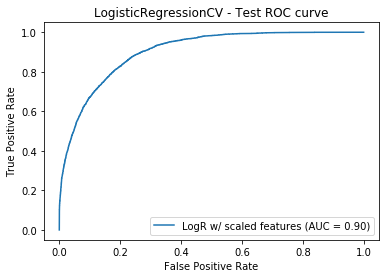

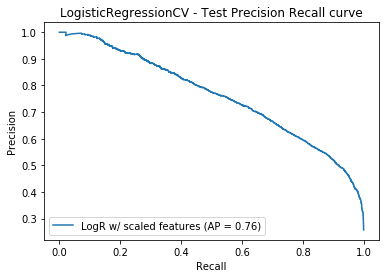

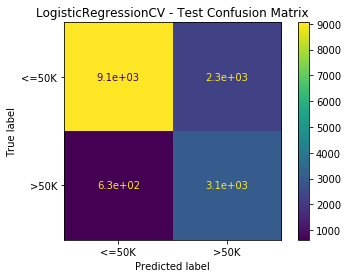

In [3]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# 'LogisticRegression' training algorithm, no hyper parameter tuning, needs manual GridSearch implementation
# 'LogisticRegression' training algorithm, automatic hyperparameter tuning, equivalent to using GridSeachCV

# RobustScaled features
logr_clf = LogisticRegressionCV(cv=3,random_state=42,solver='lbfgs',max_iter=1000,n_jobs=-1,class_weight='balanced')
logr_clf.fit(X=X_trainTrans,y=y_train)
y_train_logr_pred = logr_clf.predict(X_trainTrans)

# No scale features
logrNoScale_clf = LogisticRegressionCV(cv=3,random_state=42,solver='lbfgs',max_iter=1000,n_jobs=-1)
logrNoScale_clf.fit(X=X_trainTransNoScale,y=y_train)
y_train_logrNoScale_pred = logr_clf.predict(X_trainTransNoScale)



print('Metrics evaluating `trained` model on TRAINING set (How well did it train?):')
from sklearn.metrics import precision_recall_fscore_support

accScoreScaled = logr_clf.score(X = X_trainTrans, y = y_train)  # This is accuracy in getting the label correct
metricScore = precision_recall_fscore_support(y_true=y_train, y_pred = y_train_logr_pred, pos_label = 1, average = 'binary')
print('Scaled features accuracy score:\t\t%3.3f'%accScoreScaled)
print('Scaled features precision score:\t%3.3f'%metricScore[0])
print('Scaled features recall score:\t\t%3.3f'%metricScore[1])
print('Scaled features f1 score:\t\t%3.3f'%metricScore[2])

accScoreNoScale = logrNoScale_clf.score(X=X_trainTransNoScale,y=y_train) 
metricScoreNoScale = precision_recall_fscore_support(y_true = y_train, y_pred = y_train_logrNoScale_pred, pos_label = 1, average='binary')
print('\nNo scaled features:\t\t\t%3.3f'%accScoreNoScale)
print('No scaled features precision score:\t%3.3f'%metricScoreNoScale[0])
print('No scaled features recall score:\t%3.3f'%metricScoreNoScale[1])
print('No scaled features f1 score:\t\t%3.3f'%metricScoreNoScale[2])
# Logistic regression 'score' is mean accuracy value -> Seems decent but remember the classes are imbalanced
# 75% of data is >50K and 25% is <=50K. ACCURACY IS NOT A GOOD METRIC



# MANUAL MODEL HYPERPARAMETER TUNING IMPLEMENTATION
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer

# scoring = {'AUC': 'roc_auc', 'F1': make_scorer(f1_score), 'precision': 'precision', 'recall': 'recall'}
# grid = GridSearchCV(estimator=LogisticRegressionCV(solver='lbfgs',random_state=42,max_iter=1000),
#                     param_grid={'Cs':[2,5,10],'cv': [3, 4, 5]},
#                     scoring=scoring, refit='AUC', return_train_score=True)

# grid.fit(X_trainTrans, y_train)
# y_test_pred = grid.predict(X_testTrans)
# results = grid.cv_results_
# # print(results)



from sklearn.metrics import accuracy_score, roc_auc_score

# Predictions on our test set
y_test_logr_pred = logr_clf.predict(X_testTrans)

# Model evaluation (scalar values)
accScore = accuracy_score(y_true = y_test, y_pred = y_test_logr_pred)
rocaucScore = roc_auc_score(y_true = y_test, y_score = logr_clf.predict_proba(X_testTrans)[:,1])
testMetricScore = precision_recall_fscore_support(y_true = y_test, y_pred = y_test_logr_pred, pos_label=1, average='binary')

print('\n\n\nMetrics evaluating `trained` model on TEST set:')
print('Scaled features accuracy score:\t\t%3.3f'%accScore)
print('Scaled features precision score:\t%3.3f'%testMetricScore[0])
print('Scaled features recall score:\t\t%3.3f'%testMetricScore[1])
print('Scaled features f1 score:\t\t%3.3f'%testMetricScore[2])
print('Scaled features auc score:\t\t%3.3f'%rocaucScore)

with open('metrics.txt','w') as f:
    f.write('Metrics evaluating `trained` Logistic Regression model on TEST set:\n')
    f.write('Scaled features accuracy score:\t\t%3.3f\n'%accScore)
    f.write('Scaled features precision score:\t%3.3f\n'%testMetricScore[0])
    f.write('Scaled features recall score:\t\t%3.3f\n'%testMetricScore[1])
    f.write('Scaled features f1 score:\t\t%3.3f\n'%testMetricScore[2])
    f.write('Scaled features auc score:\t\t%3.3f\n'%rocaucScore)

print('\n\nLogistic Regression metrics (Plots):')
# Model evaluation (plots) (Evaluating trained Logistic regression model on the test set)
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
disp_roc = plot_roc_curve(logr_clf,X_testTrans,y_test,name='LogR w/ scaled features')
disp_roc.ax_.set_title('LogisticRegressionCV - Test ROC curve')
plt.savefig('plots/ROC_LogReg.png')

disp_prec_rec = plot_precision_recall_curve(logr_clf,X_testTrans,y_test,name='LogR w/ scaled features')
disp_prec_rec.ax_.set_title('LogisticRegressionCV - Test Precision Recall curve')
plt.savefig('plots/PrecRec_LogReg.png')

disp_cm = plot_confusion_matrix(logr_clf,X_testTrans,y_test,display_labels=['<=50K','>50K'])
disp_cm.ax_.set_title('LogisticRegressionCV - Test Confusion Matrix')
plt.savefig('plots/CM_LogReg.png')


# Random Forest

Metrics evaluating `trained` model on TRAINING set (How well did it train?):
Scaled features accuracy score:		1.000
Scaled features precision score:	1.000
Scaled features recall score:		1.000
Scaled features f1 score:		1.000



Metrics evaluating `trained` model on TEST set:
Scaled features accuracy score:		0.846
Scaled features precision score:	0.724
Scaled features recall score:		0.602
Scaled features f1 score:		0.658
Scaled features auc score:		0.898


Random Forest metrics (Plots):


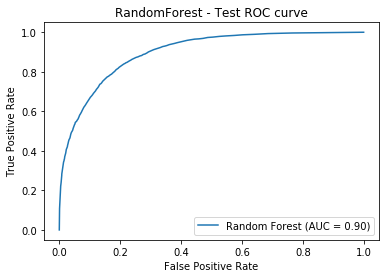

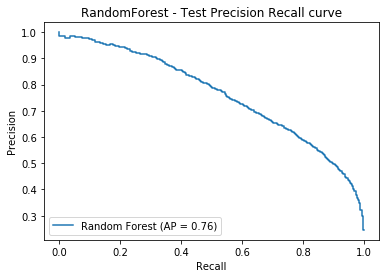

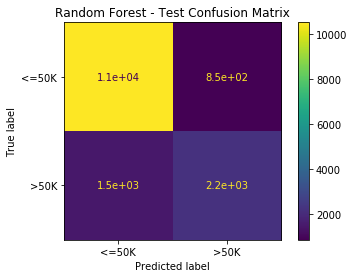

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200,n_jobs=-1,class_weight='balanced')
rf_clf.fit(X_trainTrans, y_train)
y_train_rf_pred = rf_clf.predict(X_trainTrans)


print('Metrics evaluating `trained` model on TRAINING set (How well did it train?):')
from sklearn.metrics import precision_recall_fscore_support

accScoreScaled = rf_clf.score(X = X_trainTrans, y = y_train)  # This is accuracy in getting the label correct
metricScore = precision_recall_fscore_support(y_true=y_train, y_pred=y_train_rf_pred, pos_label=1, average='binary')
print('Scaled features accuracy score:\t\t%3.3f'%accScoreScaled)
print('Scaled features precision score:\t%3.3f'%metricScore[0])
print('Scaled features recall score:\t\t%3.3f'%metricScore[1])
print('Scaled features f1 score:\t\t%3.3f'%metricScore[2])
# 100% scores indicative of overfitting



from sklearn.metrics import accuracy_score, roc_auc_score

# Predictions on our test set
y_test_rf_pred = rf_clf.predict(X=X_testTrans)

# Model evaluation (scalar values)
accScore = accuracy_score(y_true = y_test, y_pred = y_test_rf_pred)
rocaucScore = roc_auc_score(y_true = y_test, y_score = rf_clf.predict_proba(X_testTrans)[:,1])
testMetricScore = precision_recall_fscore_support(y_true = y_test, y_pred = y_test_rf_pred, pos_label=1, average='binary')

print('\n\n\nMetrics evaluating `trained` model on TEST set:')
print('Scaled features accuracy score:\t\t%3.3f'%accScore)
print('Scaled features precision score:\t%3.3f'%testMetricScore[0])
print('Scaled features recall score:\t\t%3.3f'%testMetricScore[1])
print('Scaled features f1 score:\t\t%3.3f'%testMetricScore[2])
print('Scaled features auc score:\t\t%3.3f'%rocaucScore)

with open('metrics.txt','a') as f:
    f.write('\n\nMetrics evaluating `trained` RandomForest model on TEST set:\n')
    f.write('Scaled features accuracy score:\t\t%3.3f\n'%accScore)
    f.write('Scaled features precision score:\t%3.3f\n'%testMetricScore[0])
    f.write('Scaled features recall score:\t\t%3.3f\n'%testMetricScore[1])
    f.write('Scaled features f1 score:\t\t%3.3f\n'%testMetricScore[2])
    f.write('Scaled features auc score:\t\t%3.3f\n'%rocaucScore)


print('\n\nRandom Forest metrics (Plots):')
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
disp_roc = plot_roc_curve(rf_clf,X_testTrans,y_test,name='Random Forest')
disp_roc.ax_.set_title('RandomForest - Test ROC curve')
plt.savefig('plots/ROC_RandomForest.png')
# plt.clf()

disp_prec_rec = plot_precision_recall_curve(rf_clf,X_testTrans,y_test,name='Random Forest')
disp_prec_rec.ax_.set_title('RandomForest - Test Precision Recall curve')
plt.savefig('plots/PrecRec_RandomForest.png')
# plt.clf()

disp_cm = plot_confusion_matrix(rf_clf,X_testTrans,y_test,display_labels=['<=50K','>50K'])
disp_cm.ax_.set_title('Random Forest - Test Confusion Matrix')
plt.savefig('plots/CM_RandomForest.png')
# plt.clf()

# Gradient Boosting

Metrics evaluating `trained` model on TRAINING set (How well did it train?):
Scaled features accuracy score:		0.875
Scaled features precision score:	0.807
Scaled features recall score:		0.654
Scaled features f1 score:		0.722



Metrics evaluating `trained` model on TEST set:
Scaled features accuracy score:		0.867
Scaled features precision score:	0.778
Scaled features recall score:		0.643
Scaled features f1 score:		0.704
Scaled features auc score:		0.922


Gradient Boosting metrics (Plots):


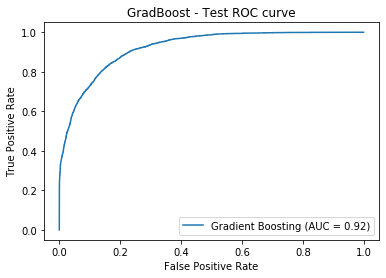

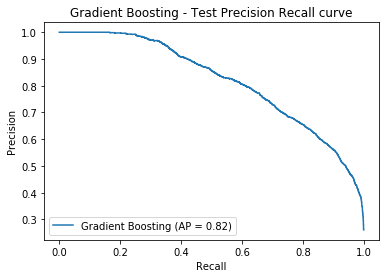

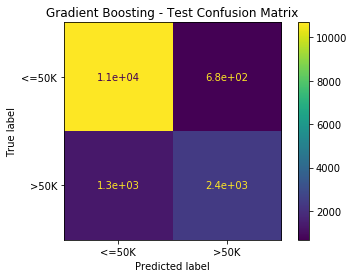

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance',learning_rate=0.2,n_estimators=1000,max_depth=3,validation_fraction=.33,n_iter_no_change=5)
gb_clf.fit(X_trainTrans, y_train)
y_train_gb_pred = gb_clf.predict(X_trainTrans)


print('Metrics evaluating `trained` model on TRAINING set (How well did it train?):')
from sklearn.metrics import precision_recall_fscore_support

accScoreScaled = gb_clf.score(X = X_trainTrans , y = y_train)  # This is accuracy in getting the label correct
metricScore = precision_recall_fscore_support(y_true=y_train, y_pred=y_train_gb_pred, pos_label=1, average='binary')
print('Scaled features accuracy score:\t\t%3.3f'%accScoreScaled)
print('Scaled features precision score:\t%3.3f'%metricScore[0])
print('Scaled features recall score:\t\t%3.3f'%metricScore[1])
print('Scaled features f1 score:\t\t%3.3f'%metricScore[2])



from sklearn.metrics import accuracy_score, roc_auc_score

# Predictions on our test set
y_test_gb_pred = gb_clf.predict(X=X_testTrans)

# Model evaluation (scalar values)
accScore = accuracy_score(y_true = y_test, y_pred = y_test_gb_pred)
rocaucScore = roc_auc_score(y_true = y_test, y_score = gb_clf.predict_proba(X_testTrans)[:,1])
testMetricScore = precision_recall_fscore_support(y_true = y_test, y_pred = y_test_gb_pred, pos_label=1, average='binary')

print('\n\n\nMetrics evaluating `trained` model on TEST set:')
print('Scaled features accuracy score:\t\t%3.3f'%accScore)
print('Scaled features precision score:\t%3.3f'%testMetricScore[0])
print('Scaled features recall score:\t\t%3.3f'%testMetricScore[1])
print('Scaled features f1 score:\t\t%3.3f'%testMetricScore[2])
print('Scaled features auc score:\t\t%3.3f'%rocaucScore)

with open('metrics.txt','a') as f:
    f.write('\n\nMetrics evaluating `trained` Gradient Boosting model on TEST set:\n')
    f.write('Scaled features accuracy score:\t\t%3.3f\n'%accScore)
    f.write('Scaled features precision score:\t%3.3f\n'%testMetricScore[0])
    f.write('Scaled features recall score:\t\t%3.3f\n'%testMetricScore[1])
    f.write('Scaled features f1 score:\t\t%3.3f\n'%testMetricScore[2])
    f.write('Scaled features auc score:\t\t%3.3f\n'%rocaucScore)

print('\n\nGradient Boosting metrics (Plots):')
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
disp_roc = plot_roc_curve(gb_clf,X_testTrans,y_test,name='Gradient Boosting')
disp_roc.ax_.set_title('GradBoost - Test ROC curve')
plt.savefig('plots/ROC_GradientBoosting.png')
# plt.clf()

disp_prec_rec = plot_precision_recall_curve(gb_clf,X_testTrans,y_test,name='Gradient Boosting')
disp_prec_rec.ax_.set_title('Gradient Boosting - Test Precision Recall curve')
plt.savefig('plots/PrecRec_GradientBoosting.png')
# plt.clf()

disp_cm = plot_confusion_matrix(gb_clf,X_testTrans,y_test,display_labels=['<=50K','>50K'])
disp_cm.ax_.set_title('Gradient Boosting - Test Confusion Matrix')
plt.savefig('plots/CM_GradientBoosting.png')
# plt.clf()

# AdaBoost

Metrics evaluating `trained` model on TRAINING set (How well did it train?):
Scaled features accuracy score:		0.887
Scaled features precision score:	0.820
Scaled features recall score:		0.698
Scaled features f1 score:		0.754



Metrics evaluating `trained` model on TEST set:
Scaled features accuracy score:		0.870
Scaled features precision score:	0.777
Scaled features recall score:		0.658
Scaled features f1 score:		0.713
Scaled features auc score:		0.926


Gradient Boosting metrics (Plots):


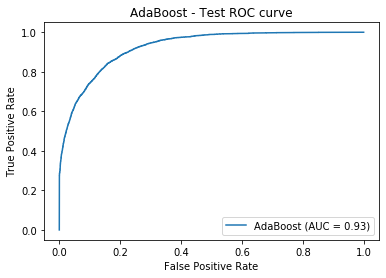

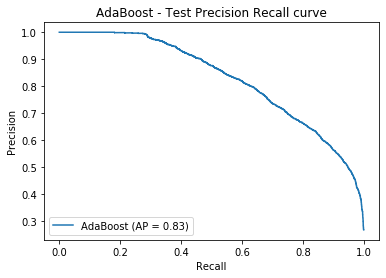

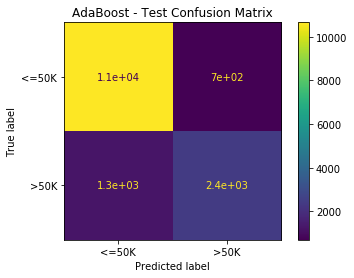

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ab_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=3,class_weight='balanced'),learning_rate=0.1,n_estimators=500,random_state=42)
ab_clf = AdaBoostClassifier(base_estimator = GradientBoostingClassifier(loss='deviance',learning_rate=0.2,n_estimators=100,max_depth=3,validation_fraction=.33,n_iter_no_change=5),learning_rate=0.1,n_estimators=500,random_state=42)
ab_clf.fit(X_trainTrans, y_train)

y_train_ab_pred = ab_clf.predict(X_trainTrans)


print('Metrics evaluating `trained` model on TRAINING set (How well did it train?):')
from sklearn.metrics import precision_recall_fscore_support

accScoreScaled = ab_clf.score(X = X_trainTrans , y = y_train)  # This is accuracy in getting the label correct
metricScore = precision_recall_fscore_support(y_true=y_train, y_pred=y_train_ab_pred, pos_label=1, average='binary')
print('Scaled features accuracy score:\t\t%3.3f'%accScoreScaled)
print('Scaled features precision score:\t%3.3f'%metricScore[0])
print('Scaled features recall score:\t\t%3.3f'%metricScore[1])
print('Scaled features f1 score:\t\t%3.3f'%metricScore[2])



from sklearn.metrics import accuracy_score, roc_auc_score

# Predictions on our test set
y_test_ab_pred = ab_clf.predict(X=X_testTrans)

# Model evaluation (scalar values)
accScore = accuracy_score(y_true = y_test, y_pred = y_test_ab_pred)
rocaucScore = roc_auc_score(y_true = y_test, y_score = ab_clf.predict_proba(X_testTrans)[:,1])
testMetricScore = precision_recall_fscore_support(y_true = y_test, y_pred = y_test_ab_pred, pos_label=1, average='binary')

print('\n\n\nMetrics evaluating `trained` model on TEST set:')
print('Scaled features accuracy score:\t\t%3.3f'%accScore)
print('Scaled features precision score:\t%3.3f'%testMetricScore[0])
print('Scaled features recall score:\t\t%3.3f'%testMetricScore[1])
print('Scaled features f1 score:\t\t%3.3f'%testMetricScore[2])
print('Scaled features auc score:\t\t%3.3f'%rocaucScore)

with open('metrics.txt','a') as f:
    f.write('\n\nMetrics evaluating `trained` AdaBoost model on TEST set:\n')
    f.write('Scaled features accuracy score:\t\t%3.3f\n'%accScore)
    f.write('Scaled features precision score:\t%3.3f\n'%testMetricScore[0])
    f.write('Scaled features recall score:\t\t%3.3f\n'%testMetricScore[1])
    f.write('Scaled features f1 score:\t\t%3.3f\n'%testMetricScore[2])
    f.write('Scaled features auc score:\t\t%3.3f\n'%rocaucScore)

print('\n\nGradient Boosting metrics (Plots):')
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
disp_roc = plot_roc_curve(ab_clf,X_testTrans,y_test,name='AdaBoost')
disp_roc.ax_.set_title('AdaBoost - Test ROC curve')
plt.savefig('plots/ROC_AdaBoost.png')
# plt.clf()

disp_prec_rec = plot_precision_recall_curve(ab_clf,X_testTrans,y_test,name='AdaBoost')
disp_prec_rec.ax_.set_title('AdaBoost - Test Precision Recall curve')
plt.savefig('plots/PrecRec_AdaBoost.png')
# plt.clf()

disp_cm = plot_confusion_matrix(ab_clf,X_testTrans,y_test,display_labels=['<=50K','>50K'])
disp_cm.ax_.set_title('AdaBoost - Test Confusion Matrix')
plt.savefig('plots/CM_AdaBoost.png')
# plt.clf()

# Keras (Deep Learning)

## Multilayer Perceptron (for binary classification)

Using TensorFlow backend.


Train on 21112 samples, validate on 9049 samples
Epoch 1/100
21112/21112 [==============================] - 2s 85us/step - loss: 16.4520 - tp: 1955.0000 - fp: 1320.0000 - tn: 14530.0000 - fn: 3307.0000 - accuracy: 0.7808 - precision: 0.5969 - recall: 0.3715 - auc: 0.7530 - val_loss: 1.2713 - val_tp: 1372.0000 - val_fp: 780.0000 - val_tn: 6023.0000 - val_fn: 874.0000 - val_accuracy: 0.8172 - val_precision: 0.6375 - val_recall: 0.6109 - val_auc: 0.8631
Epoch 2/100
21112/21112 [==============================] - 2s 71us/step - loss: 2.1162 - tp: 2574.0000 - fp: 1541.0000 - tn: 14309.0000 - fn: 2688.0000 - accuracy: 0.7997 - precision: 0.6255 - recall: 0.4892 - auc: 0.8104 - val_loss: 0.3840 - val_tp: 690.0000 - val_fp: 308.0000 - val_tn: 6495.0000 - val_fn: 1556.0000 - val_accuracy: 0.7940 - val_precision: 0.6914 - val_recall: 0.3072 - val_auc: 0.8694
Epoch 3/100
21112/21112 [==============================] - 2s 71us/step - loss: 0.6131 - tp: 2510.0000 - fp: 1380.0000 - tn: 14470.0000 - fn

21112/21112 [==============================] - 2s 78us/step - loss: 0.3455 - tp: 3154.0000 - fp: 1184.0000 - tn: 14666.0000 - fn: 2108.0000 - accuracy: 0.8441 - precision: 0.7271 - recall: 0.5994 - auc: 0.8964 - val_loss: 0.3431 - val_tp: 1317.0000 - val_fp: 402.0000 - val_tn: 6401.0000 - val_fn: 929.0000 - val_accuracy: 0.8529 - val_precision: 0.7661 - val_recall: 0.5864 - val_auc: 0.8981
Epoch 22/100
21112/21112 [==============================] - 1s 69us/step - loss: 0.3458 - tp: 3135.0000 - fp: 1163.0000 - tn: 14687.0000 - fn: 2127.0000 - accuracy: 0.8442 - precision: 0.7294 - recall: 0.5958 - auc: 0.8955 - val_loss: 0.3392 - val_tp: 1332.0000 - val_fp: 435.0000 - val_tn: 6368.0000 - val_fn: 914.0000 - val_accuracy: 0.8509 - val_precision: 0.7538 - val_recall: 0.5931 - val_auc: 0.8985
Epoch 23/100
21112/21112 [==============================] - 2s 73us/step - loss: 0.3435 - tp: 3142.0000 - fp: 1185.0000 - tn: 14665.0000 - fn: 2120.0000 - accuracy: 0.8435 - precision: 0.7261 - recall:

21112/21112 [==============================] - 1s 70us/step - loss: 0.3336 - tp: 3182.0000 - fp: 1124.0000 - tn: 14726.0000 - fn: 2080.0000 - accuracy: 0.8482 - precision: 0.7390 - recall: 0.6047 - auc: 0.9022 - val_loss: 0.3379 - val_tp: 1288.0000 - val_fp: 399.0000 - val_tn: 6404.0000 - val_fn: 958.0000 - val_accuracy: 0.8500 - val_precision: 0.7635 - val_recall: 0.5735 - val_auc: 0.8987
Epoch 42/100
21112/21112 [==============================] - 1s 70us/step - loss: 0.3337 - tp: 3175.0000 - fp: 1138.0000 - tn: 14712.0000 - fn: 2087.0000 - accuracy: 0.8472 - precision: 0.7361 - recall: 0.6034 - auc: 0.9020 - val_loss: 0.3378 - val_tp: 1289.0000 - val_fp: 400.0000 - val_tn: 6403.0000 - val_fn: 957.0000 - val_accuracy: 0.8500 - val_precision: 0.7632 - val_recall: 0.5739 - val_auc: 0.8987
Epoch 43/100
21112/21112 [==============================] - 2s 73us/step - loss: 0.3336 - tp: 3199.0000 - fp: 1126.0000 - tn: 14724.0000 - fn: 2063.0000 - accuracy: 0.8489 - precision: 0.7397 - recall:

21112/21112 [==============================] - 1s 70us/step - loss: 0.3357 - tp: 3188.0000 - fp: 1145.0000 - tn: 14705.0000 - fn: 2074.0000 - accuracy: 0.8475 - precision: 0.7357 - recall: 0.6059 - auc: 0.9009 - val_loss: 0.3379 - val_tp: 1288.0000 - val_fp: 399.0000 - val_tn: 6404.0000 - val_fn: 958.0000 - val_accuracy: 0.8500 - val_precision: 0.7635 - val_recall: 0.5735 - val_auc: 0.8986
Epoch 62/100
21112/21112 [==============================] - 1s 69us/step - loss: 0.3354 - tp: 3153.0000 - fp: 1134.0000 - tn: 14716.0000 - fn: 2109.0000 - accuracy: 0.8464 - precision: 0.7355 - recall: 0.5992 - auc: 0.9019 - val_loss: 0.3379 - val_tp: 1288.0000 - val_fp: 399.0000 - val_tn: 6404.0000 - val_fn: 958.0000 - val_accuracy: 0.8500 - val_precision: 0.7635 - val_recall: 0.5735 - val_auc: 0.8986
Epoch 63/100
21112/21112 [==============================] - 1s 70us/step - loss: 0.3356 - tp: 3180.0000 - fp: 1106.0000 - tn: 14744.0000 - fn: 2082.0000 - accuracy: 0.8490 - precision: 0.7420 - recall:

21112/21112 [==============================] - 1s 70us/step - loss: 0.3359 - tp: 3180.0000 - fp: 1148.0000 - tn: 14702.0000 - fn: 2082.0000 - accuracy: 0.8470 - precision: 0.7348 - recall: 0.6043 - auc: 0.9014 - val_loss: 0.3379 - val_tp: 1288.0000 - val_fp: 399.0000 - val_tn: 6404.0000 - val_fn: 958.0000 - val_accuracy: 0.8500 - val_precision: 0.7635 - val_recall: 0.5735 - val_auc: 0.8986
Epoch 82/100
21112/21112 [==============================] - 2s 73us/step - loss: 0.3356 - tp: 3197.0000 - fp: 1132.0000 - tn: 14718.0000 - fn: 2065.0000 - accuracy: 0.8486 - precision: 0.7385 - recall: 0.6076 - auc: 0.9014 - val_loss: 0.3379 - val_tp: 1288.0000 - val_fp: 399.0000 - val_tn: 6404.0000 - val_fn: 958.0000 - val_accuracy: 0.8500 - val_precision: 0.7635 - val_recall: 0.5735 - val_auc: 0.8986
Epoch 83/100
21112/21112 [==============================] - 2s 73us/step - loss: 0.3358 - tp: 3190.0000 - fp: 1164.0000 - tn: 14686.0000 - fn: 2072.0000 - accuracy: 0.8467 - precision: 0.7327 - recall:

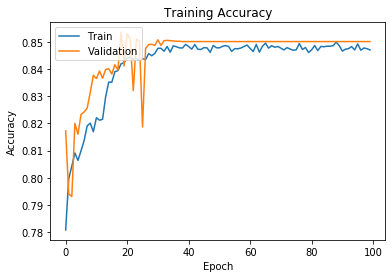

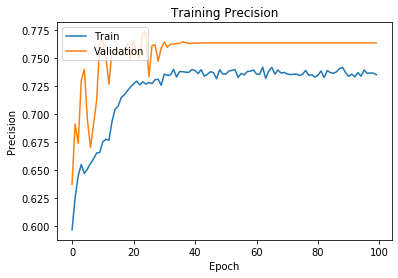

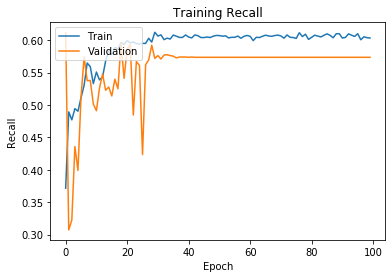

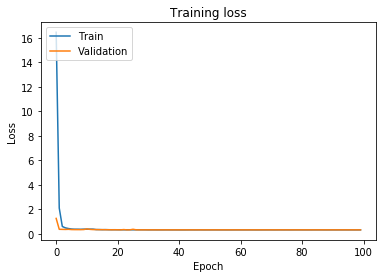

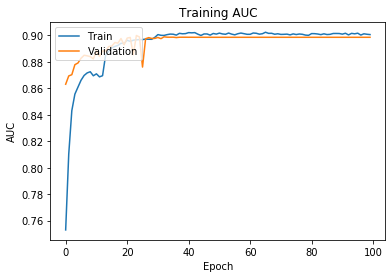

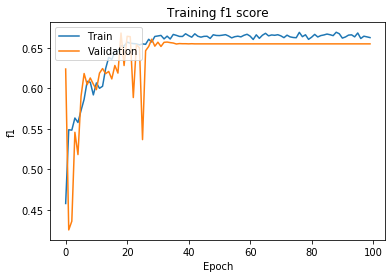



Model performance metrics on the test:
	 loss : 0.3337356866613169
	 tp : 2124.0
	 fp : 707.0
	 tn : 10653.0
	 fn : 1576.0
	 accuracy : 0.8484063744544983
	 precision : 0.7502649426460266
	 recall : 0.5740540623664856
	 auc : 0.9002397656440735





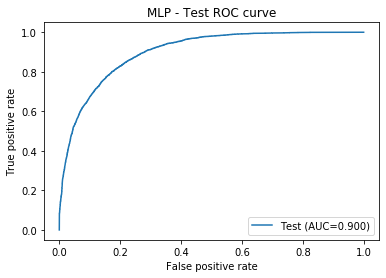

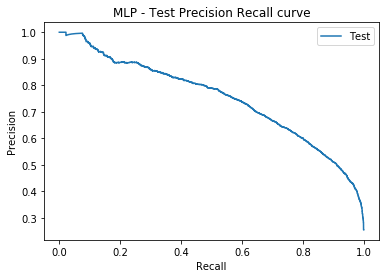

Confusion Matrix
[[10653.   707.]
 [ 1576.  2124.]]


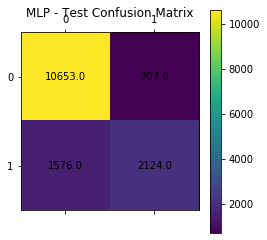

In [7]:
import matplotlib.pyplot as plt
# print(X_trainTrans.shape)


from keras.layers import Input, Dense, Dropout

# For a single-input model with 1 class (binary classification):
# A layer instance is callable on a tensor, and returns a tensor

inputs = Input(shape=(X_trainTrans.shape[1],)) # This returns a tensor

numInputNeurons = X_trainTrans.shape[1] # Use number of features as number of neurons
numHiddenLayerNeurons = 90
input_layer = Dense(numInputNeurons, activation='relu')(inputs)
drop_1 = Dropout(0.5)(input_layer)
hidden_layer = Dense(numHiddenLayerNeurons, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(drop_2) #softmax, tanh


# Create the model with Input layer and the Dense/Droput layers
from keras.models import Model
model = Model(inputs=inputs, outputs=output_layer)


# metrics to keep track of over every epoch
from keras import metrics
METRICS = [
    metrics.TruePositives(name='tp'),
    metrics.FalsePositives(name='fp'),
    metrics.TrueNegatives(name='tn'),
    metrics.FalseNegatives(name='fn'), 
    metrics.BinaryAccuracy(name='accuracy',threshold=0.5),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
]
# For a binary classification problem
from keras.optimizers import RMSprop
RMSprop(learning_rate=0.01, rho=0.9)#0.001
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',#rmsprop,sgd
              metrics=METRICS)

from keras.utils import plot_model
plot_model(model, to_file='savedModel/MLPmodel.png')

# Recall we have an imbalanced class, lets try and fix that
# 'This can be useful to tell the model to "pay more attention" to samples from an under-represented class.'
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

# Train the model, iterating on the data in batches of 'n' samples
num_epochs = 100 #100
size_of_batch = 20 #50
validation_data = None
from keras.callbacks import ReduceLROnPlateau # Reduce the learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, 
                  mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
history = model.fit(x=X_trainTrans, y=y_train, epochs=num_epochs, batch_size=size_of_batch,
                    validation_data=validation_data, validation_split=.3,
                    shuffle=True, callbacks=[reduce_lr],class_weight=class_weights)


# Evaluate model over the test set
test_sample_weight = None
loss_and_metrics = model.evaluate(x=X_testTrans, y=y_test, batch_size=size_of_batch, sample_weight=None)
lossMetricsLegible = [[metricName,metricValue] for metricName, metricValue in zip(history.history.keys(), loss_and_metrics)]

print('\n\n============================================================================================')
print('Model performance metrics on the TRAINING of Model with VALIDATION:')
# print(history.history.keys()) #prints keys
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/trainingAccuracy.png')
plt.show()

# Plot training & validation precision values
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Training Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/trainingPrecision.png')
plt.show()

# Plot training & validation recall values
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Training Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/trainingRecall.png')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/trainingLoss.png')
plt.show()

# Plot training & validation AUC values
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Training AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/trainingAUC.png')
plt.show()

f1 = 2*(np.array(history.history['precision'])*np.array(history.history['recall'])) / \
    (np.array(history.history['precision']) + np.array(history.history['recall']))
val_f1 = 2*(np.array(history.history['val_precision'])*np.array(history.history['val_recall'])) / \
    (np.array(history.history['val_precision']) + np.array(history.history['val_recall']))    
# Plot training & validation f1 values
plt.plot(f1)
plt.plot(val_f1)
plt.title('Training f1 score')
plt.ylabel('f1')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('kerasPlots/trainingf1.png')
plt.show()
print('============================================================================================')



print('\n\n============================================================================================')
print('Model performance metrics on the test:')
for ind in range(len(lossMetricsLegible)):
    print('\t',lossMetricsLegible[ind][0][4:],':',lossMetricsLegible[ind][1])
print('\n\n')
tp = loss_and_metrics[1]
fp = loss_and_metrics[2]
tn = loss_and_metrics[3]
fn = loss_and_metrics[4]


with open('metrics.txt','a') as f:
    f.write('\n\nMetrics evaluating `trained` Keras MLP model on TEST set:\n')
    f.write('Scaled features accuracy score:\t\t%3.3f\n'%lossMetricsLegible[5][1])
    f.write('Scaled features precision score:\t%3.3f\n'%lossMetricsLegible[6][1])
    f.write('Scaled features recall score:\t\t%3.3f\n'%lossMetricsLegible[7][1])
    f1 = 2*lossMetricsLegible[6][1]*lossMetricsLegible[7][1]/(lossMetricsLegible[6][1]+lossMetricsLegible[7][1])
    f.write('Scaled features f1 score:\t\t%3.3f\n'%f1)
    f.write('Scaled features auc score:\t\t%3.3f\n'%lossMetricsLegible[8][1])

from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_testTrans).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Test (AUC={:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('MLP - Test ROC curve')
plt.legend(loc='best')
plt.savefig('kerasPlots/testROC.png')
plt.savefig('plots/ROC_MLP.png')
# plt.clf()
plt.show()


from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_keras)

plt.plot(recall, precision, label='Test')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MLP - Test Precision Recall curve')
plt.legend(loc='best')
plt.savefig('kerasPlots/testPrecRec.png')
plt.savefig('plots/PrecRec_MLP.png')
# plt.clf()
plt.show()

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
CM = np.array([[tn,fp],[fn,tp]])
print('Confusion Matrix')
print(CM)
im = plt.matshow(CM,label=['<=50K','>50K'])
for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
        text = plt.text(j, i, CM[i, j],
                       ha='center', va='center', color='k')
plt.title('MLP - Test Confusion Matrix')
plt.colorbar(im)
plt.savefig('kerasPlots/testCM.png')
plt.savefig('plots/CM_MLP.png')
# plt.clf()
plt.show()



print('============================================================================================')






# Save the weights
model.save_weights('savedModel/MLPmodel_weights.h5')

# Save the model architecture
with open('savedModel/MLPmodel_architecture.json', 'w') as f:
    f.write(model.to_json())

## Load MLP model and tune Hyperparameters

In [ ]:
# from keras.models import model_from_json

# # Model reconstruction from JSON file
# with open('savedModel/MLPmodel_architecture.json', 'r') as f:
#     model = model_from_json(f.read())

# # Load weights into the new model
# model.load_weights('savedModel/MLPmodel_weights.h5')